Imports

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the Data

In [3]:
path = r'.\Data\Months_237' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

main_df = pd.concat(li, axis=0, ignore_index=True)

In [5]:
len(main_df)

3641682

Removing Duplicates and checking for Nan's

In [21]:
main_df.duplicated().sum()

5916

In [22]:
main_df.drop_duplicates(inplace=True) # Removing Duplicates
# Printing where are the nan
main_df.isnull().sum()

pickup_datetime        0
dropoff_datetime       0
passenger_count     2322
trip_distance          0
PULocationID           0
DOLocationID           0
dtype: int64

As the nan are only at the passenger_count we can replace it with 1

In [23]:
main_df['passenger_count'] = main_df['passenger_count'].fillna(1)

In [24]:
# Converting the Date columns to DateTime type.
main_df['pickup_datetime'] = pd.to_datetime(main_df['pickup_datetime'])
main_df['dropoff_datetime'] = pd.to_datetime(main_df['dropoff_datetime'])
# Getting the delta between the pick up and drop off in a new column.
t1 = main_df['pickup_datetime']
t2 = main_df['dropoff_datetime']
# Adding a Trip_time column based.
main_df['trip_time'] = (t2-t1).dt.total_seconds()/60
# Creating a speed column
main_df['speed'] = (main_df.trip_distance / (main_df.trip_time /60) )
# Creating a PU date and time
main_df['pickup_date'] = pd.to_datetime(main_df['pickup_datetime']).dt.date
main_df['pickup_time'] = pd.to_datetime(main_df['pickup_datetime']).dt.time
main_df['pickup_date']  = pd.to_datetime(main_df['pickup_date'])

# Creating Time bins
bins =[x for x in range(25)]
labels = ['00:00 - 00:59',
            '01:00 - 01:59',
            '02:00 - 02:59',
            '03:00 - 03:59',
            '04:00 - 04:59',
            '05:00 - 05:59',
            '06:00 - 06:59',
            '07:00 - 07:59',
            '08:00 - 08:59',
            '09:00 - 09:59',
            '10:00 - 10:59',
            '11:00 - 11:59',
            '12:00 - 12:59',
            '13:00 - 13:59',
            '14:00 - 14:59',
            '15:00 - 15:59',
            '16:00 - 16:59',
            '17:00 - 17:59',
            '18:00 - 18:59',
            '19:00 - 19:59',
            '20:00 - 20:59',
            '21:00 - 21:59',
            '22:00 - 22:59',
            '23:00 - 23:59'
                            ]
main_df['time_binned'] = pd.cut(main_df.pickup_datetime.dt.hour, bins, labels=labels, right=False)


In [28]:
main_df.isnull().sum()
main_df.dropna(inplace=True)


In [29]:
main_df.isnull().sum()


pickup_datetime     0
dropoff_datetime    0
passenger_count     0
trip_distance       0
PULocationID        0
DOLocationID        0
trip_time           0
speed               0
pickup_date         0
pickup_time         0
time_binned         0
dtype: int64

In [30]:
main_df.drop(['dropoff_datetime','PULocationID','DOLocationID'], axis=1,inplace=True)
main_df

,pickup_datetime,passenger_count,trip_distance,trip_time,speed,pickup_date,pickup_time,time_binned
1,2019-01-01 00:00:00,2.0,7.37,63.200000,6.996835,2019-01-01,00:00:00,00:00 - 00:59
2,2019-01-01 00:36:01,1.0,1.67,11.583333,8.650360,2019-01-01,00:36:01,00:00 - 00:59
3,2019-01-01 00:42:41,1.0,2.12,12.550000,10.135458,2019-01-01,00:42:41,00:00 - 00:59
4,2019-01-01 00:24:43,1.0,1.00,5.500000,10.909091,2019-01-01,00:24:43,00:00 - 00:59
5,2019-01-01 00:39:55,1.0,1.90,11.100000,10.270270,2019-01-01,00:39:55,00:00 - 00:59
...,...,...,...,...,...,...,...,...
3641677,2019-09-30 16:57:03,1.0,14.10,62.566667,13.521577,2019-09-30,16:57:03,16:00 - 16:59
3641678,2019-09-30 17:10:00,1.0,9.83,54.000000,10.922222,2019-09-30,17:10:00,17:00 - 17:59
3641679,2019-09-30 19:11:00,1.0,8.92,29.000000,18.455172,2019-09-30,19:11:00,19:00 - 19:59
3641680,2019-09-30 23:32:00,1.0,12.58,26.000000,29.030769,2019-09-30,23:32:00,23:00 - 23:59


removing junk

In [31]:
main_df.drop(main_df[main_df['passenger_count'] >= 5].index,axis=0,inplace=True) # num of passengers > 5
main_df.drop(main_df[main_df['passenger_count'] <= 0].index,axis=0,inplace=True) # num of passengers < 0
main_df.drop(main_df[main_df['trip_distance'] <= 0].index,axis=0,inplace=True) # trip distance < 0
main_df.drop(main_df[main_df['trip_time'] <= 0].index,axis=0,inplace=True) # trip time <= 0
main_df.drop(main_df[main_df['pickup_datetime'].dt.year != 2019].index,axis=0,inplace=True) # dates not from 2019
main_df.drop(main_df[main_df['trip_time'] > 720].index,axis=0,inplace= True) # time > 12 hours
main_df.drop(main_df[main_df['speed'] <=  0 ].index,axis=0,inplace= True) # speed <= 0

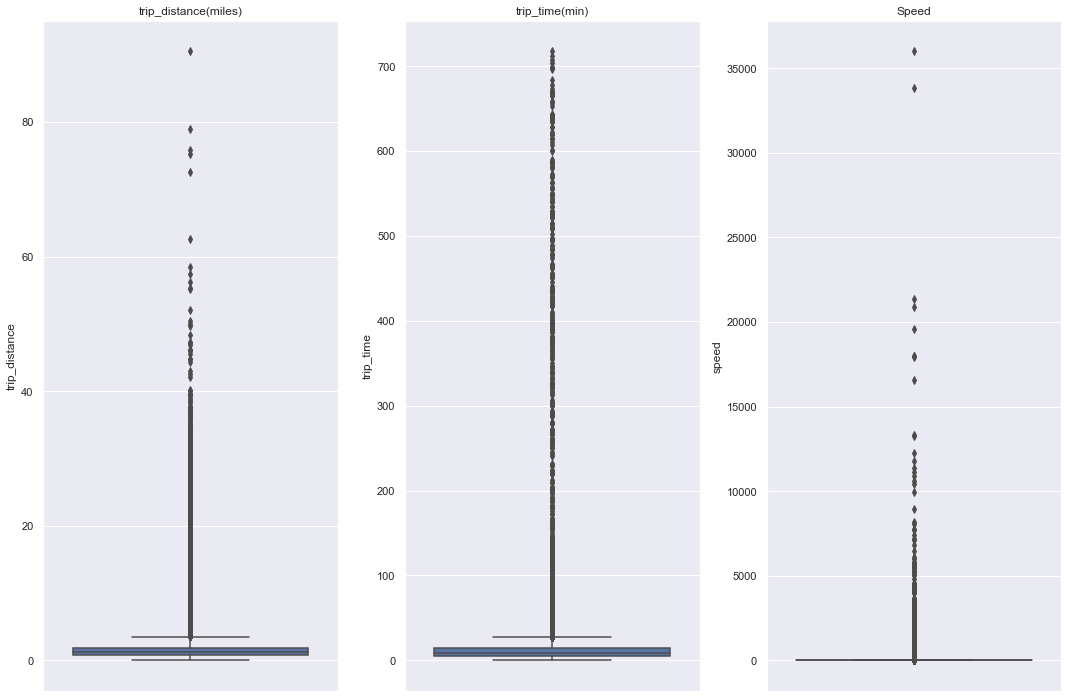

In [32]:
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=main_df,y='trip_distance',orient='v',ax=axes[0])
sns.boxplot(data=main_df,y='trip_time',orient='v',ax=axes[1])
sns.boxplot(data=main_df,y='speed',orient='v',ax=axes[2])
axes[0].set_title("trip_distance(miles)")
axes[1].set_title("trip_time(min)")
axes[2].set_title("Speed")
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)

C:\Users\barka\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


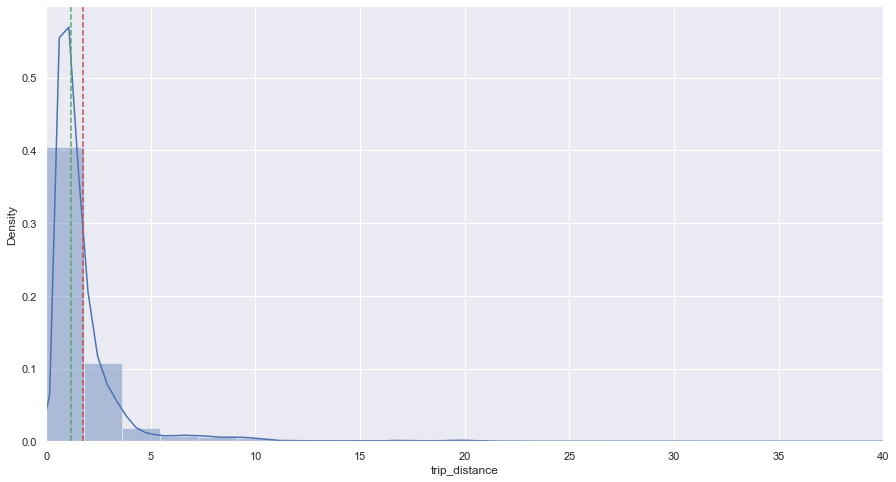

C:\Users\barka\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


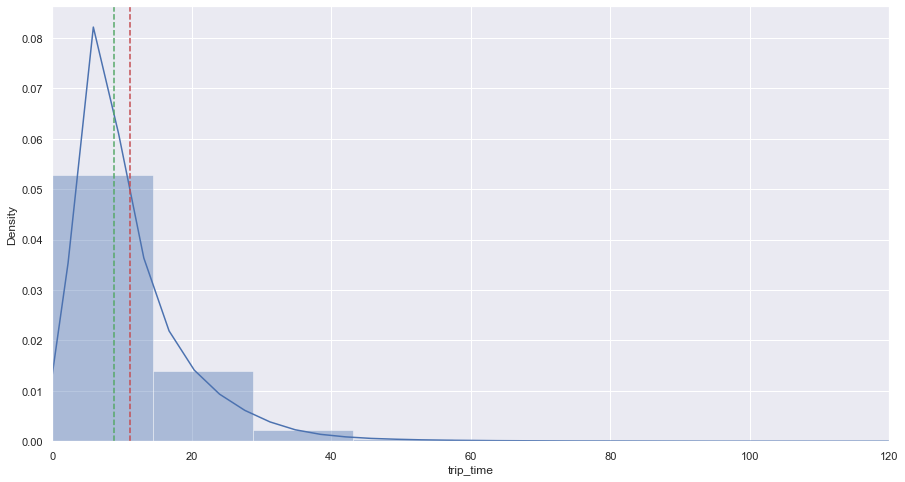

C:\Users\barka\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


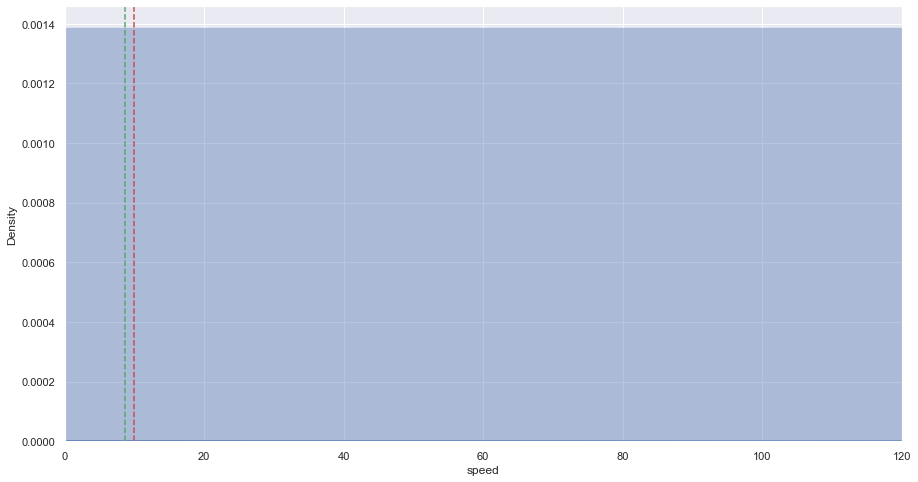

In [38]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlim(0, 40)
sns.distplot(main_df['trip_distance'])
plt.axvline(np.median(main_df['trip_distance']),color='g', linestyle='--')
plt.axvline(np.mean(main_df['trip_distance']),color='r', linestyle='--')
plt.show()
plt.xlim(0, 120)
sns.distplot(main_df['trip_time'])
plt.axvline(np.median(main_df['trip_time']),color='g', linestyle='--')
plt.axvline(np.mean(main_df['trip_time']),color='r', linestyle='--')
plt.show()
plt.xlim(0, 1000)
sns.distplot(main_df['speed'])
plt.axvline(np.median(main_df['speed']),color='g', linestyle='--')
plt.axvline(np.mean(main_df['speed']),color='r', linestyle='--')
plt.show()

C:\Users\barka\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


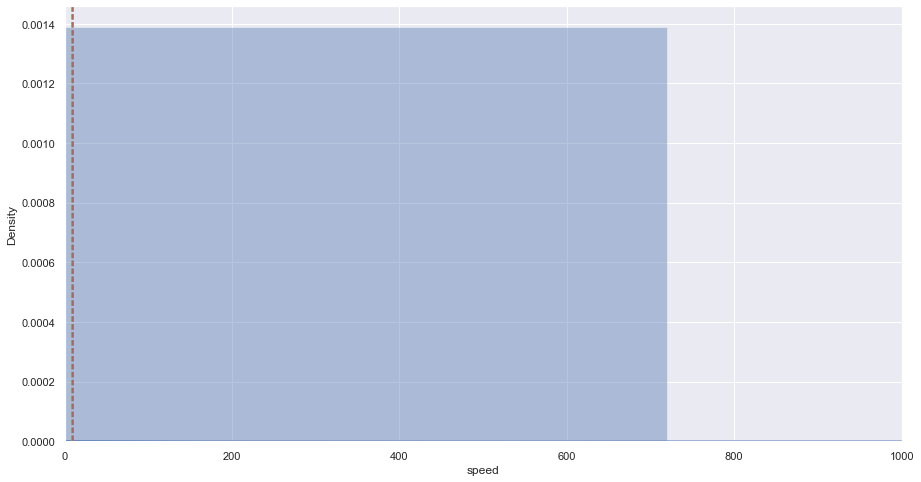

In [39]:
plt.xlim(0, 1000)
sns.distplot(main_df['speed'])
plt.axvline(np.median(main_df['speed']),color='g', linestyle='--')
plt.axvline(np.mean(main_df['speed']),color='r', linestyle='--')
plt.show()

Finding and removing Outliers

In [10]:
# Add a outlier detection function using IQR
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)
# Find the Outliers for Speed
botrange, toprange, outliers = get_outliers(main_df, main_df['speed'])
print(f'speed top range outlier: {toprange}')
print(f'speed bottom range outlier: {botrange}')
index_list = [i for i in main_df.index if i not in outliers.index]
main_no_outliers_df = main_df.loc[index_list]

botrange, toprange, outliers = get_outliers(main_df, main_df['trip_distance'])
print(f'trip_distance top range outlier: {toprange}')
print(f'trip_distance bottom range outlier: {botrange}')
index_list = [i for i in main_no_outliers_df.index if i not in outliers.index]
main_no_outliers_df = main_no_outliers_df.loc[index_list]

botrange, toprange, outliers = get_outliers(main_df, main_df['trip_time'])
print(f'trip_time top range outlier: {toprange}')
print(f'trip_time bottom range outlier: {botrange}')
index_list = [i for i in main_no_outliers_df.index if i not in outliers.index]
main_no_outliers_df = main_no_outliers_df.loc[index_list]

# remove the outliers if needed
main_no_outliers_df.reset_index(inplace=True, drop=True)
main_df = main_no_outliers_df

speed top range outlier: 19.099843553338903
speed bottom range outlier: -0.9698399068377794
trip_distance top range outlier: 3.55
trip_distance bottom range outlier: -0.8499999999999999
trip_time top range outlier: 26.933333333333334
trip_time bottom range outlier: -7.333333333333333


In [14]:
min(main_df.trip_distance)

0.01

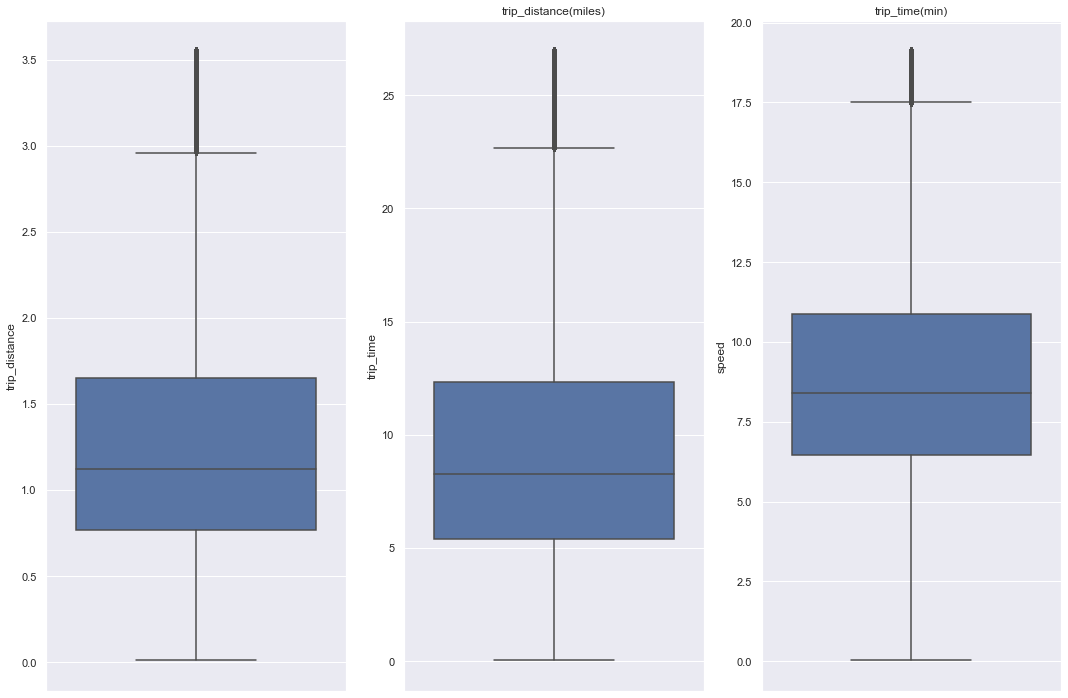

In [17]:
fig, axes = plt.subplots(1, 3)
sns.boxplot(data=main_no_outliers_df,y='trip_distance',orient='v',ax=axes[0])
sns.boxplot(data=main_no_outliers_df,y='trip_time',orient='v',ax=axes[1])
sns.boxplot(data=main_no_outliers_df,y='speed',orient='v',ax=axes[2])
axes[1].set_title("trip_distance(miles)")
axes[2].set_title("trip_time(min)")
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(15)

Choosing a distance to split to Short and Long Distance

In [29]:
# trip_distance = pd.DataFrame(np.floor(main_df['trip_distance']))
trip_distance = pd.DataFrame(main_df['trip_distance'])
trip_distance = trip_distance.groupby(["trip_distance"]).agg(
    count_col=pd.NamedAgg(column="trip_distance", aggfunc="count")
)
trip_distance['count_col_prec'] = (trip_distance.count_col / trip_distance.count_col.sum()*100)
trip_distance.reset_index(inplace=True)
trip_distance

,trip_distance,count_col,count_col_prec
0,0.01,816,0.027757
1,0.02,609,0.020715
2,0.03,444,0.015103
3,0.04,365,0.012416
4,0.05,299,0.010171
...,...,...,...
350,3.51,783,0.026634
351,3.52,785,0.026702
352,3.53,681,0.023165
353,3.54,726,0.024695


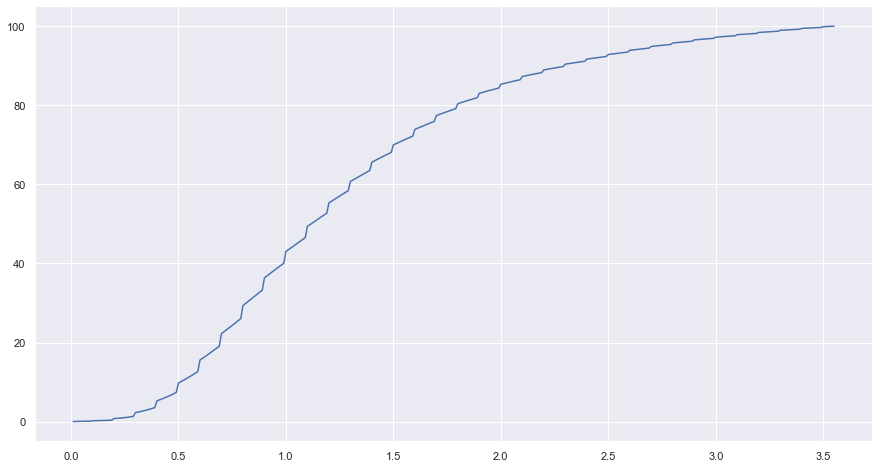

In [30]:
cumulative = np.cumsum(trip_distance.count_col_prec)
plt.plot(trip_distance.trip_distance,cumulative)

Short distance >= 1.5 Mile
Long distance < 1.5 Mile

In [31]:
# main_df['isShort'] = np.where(main_df['trip_distance']<=1.5,1,0)

In [32]:
weather_df = pd.read_csv(r'.\Data\NYC Weather.csv')
weather_df.head()

,Date,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,New Snow,Snow Depth
0,01/01/2019,58,39,48.5,13.3,16,0,0.06,0,0
1,02/01/2019,40,35,37.5,2.5,27,0,0,0,0
2,03/01/2019,44,37,40.5,5.7,24,0,0,0,0
3,04/01/2019,47,35,41.0,6.3,24,0,0,0,0
4,05/01/2019,47,41,44.0,9.5,21,0,0.5,0,0


In [33]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'],format='%d/%m/%Y')
weather_df.rename(columns={'Date':'pickup_date'},inplace=True)
weather_df.head()

,pickup_date,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2019-01-01,58,39,48.5,13.3,16,0,0.06,0,0
1,2019-01-02,40,35,37.5,2.5,27,0,0,0,0
2,2019-01-03,44,37,40.5,5.7,24,0,0,0,0
3,2019-01-04,47,35,41.0,6.3,24,0,0,0,0
4,2019-01-05,47,41,44.0,9.5,21,0,0.5,0,0


In [34]:
use_per_date = main_df.groupby(['pickup_date']).sum()
weather_df.sort_values('pickup_date', inplace=True)
use_per_date.sort_values('pickup_date',inplace=True)
use_per_date.reset_index(inplace=True)
weather_df

,pickup_date,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2019-01-01,58,39,48.5,13.3,16,0,0.06,0,0
1,2019-01-02,40,35,37.5,2.5,27,0,0,0,0
2,2019-01-03,44,37,40.5,5.7,24,0,0,0,0
3,2019-01-04,47,35,41.0,6.3,24,0,0,0,0
4,2019-01-05,47,41,44.0,9.5,21,0,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,54,46,50.0,13.8,15,0,0,0,0
361,2019-12-28,51,43,47.0,11.0,18,0,0,0,0
362,2019-12-29,44,39,41.5,5.7,23,0,0.25,0,0
363,2019-12-30,41,37,39.0,3.4,26,0,0.74,T,0


In [38]:
weather_df.duplicated().sum()

0

In [40]:
weather_df.head()

,pickup_date,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2019-01-01,58,39,48.5,13.3,16,0,0.06,0,0
1,2019-01-02,40,35,37.5,2.5,27,0,0,0,0
2,2019-01-03,44,37,40.5,5.7,24,0,0,0,0
3,2019-01-04,47,35,41.0,6.3,24,0,0,0,0
4,2019-01-05,47,41,44.0,9.5,21,0,0.5,0,0


In [41]:
weather_df['pickup_date'] = pd.to_datetime(weather_df["pickup_date"].dt.strftime('%Y-%m-%d'))
main_df['pickup_date'] = pd.to_datetime(main_df["pickup_date"].dt.strftime('%Y-%m-%d'))
main_df.sort_values('pickup_date',inplace= True)
main_df = pd.merge_asof(main_df,weather_df,on='pickup_date')

In [42]:
main_df

,pickup_datetime,passenger_count,trip_distance,trip_time,speed,pickup_date,pickup_time,time_binned,weekday,isShort,Tmax,Tmin,Tavg,Tdep,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2019-01-01 00:36:01,1.0,1.67,11.583333,8.650360,2019-01-01,00:36:01,00:00 - 00:59,Tuesday,0,58,39,48.5,13.3,16,0,0.06,0,0
1,2019-01-01 16:24:40,3.0,1.93,7.150000,16.195804,2019-01-01,16:24:40,16:00 - 16:59,Tuesday,0,58,39,48.5,13.3,16,0,0.06,0,0
2,2019-01-01 15:58:09,1.0,0.57,3.600000,9.500000,2019-01-01,15:58:09,15:00 - 15:59,Tuesday,1,58,39,48.5,13.3,16,0,0.06,0,0
3,2019-01-01 16:39:37,3.0,0.77,4.350000,10.620690,2019-01-01,16:39:37,16:00 - 16:59,Tuesday,1,58,39,48.5,13.3,16,0,0.06,0,0
4,2019-01-01 16:54:41,4.0,0.94,7.083333,7.962353,2019-01-01,16:54:41,16:00 - 16:59,Tuesday,1,58,39,48.5,13.3,16,0,0.06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939838,2019-12-31 17:41:39,1.0,0.95,3.683333,15.475113,2019-12-31,17:41:39,17:00 - 17:59,Tuesday,1,45,36,40.5,5.1,24,0,0.02,0,0
2939839,2019-12-31 17:53:34,3.0,2.37,14.500000,9.806897,2019-12-31,17:53:34,17:00 - 17:59,Tuesday,0,45,36,40.5,5.1,24,0,0.02,0,0
2939840,2019-12-31 17:11:10,1.0,1.90,10.250000,11.121951,2019-12-31,17:11:10,17:00 - 17:59,Tuesday,0,45,36,40.5,5.1,24,0,0.02,0,0
2939841,2019-12-31 17:00:48,1.0,1.16,8.516667,8.172211,2019-12-31,17:00:48,17:00 - 17:59,Tuesday,1,45,36,40.5,5.1,24,0,0.02,0,0


In [43]:
main_df.drop(['pickup_datetime'],axis=1,inplace=True)
main_df.drop(['pickup_time'],axis=1,inplace=True)
main_df['Precipitation'].replace('T','0.00001',inplace=True)
main_df['New Snow'].replace('T','0.00001',inplace=True)
main_df['Snow Depth'].replace('T','0.00001',inplace=True)

main_df['Precipitation'] = main_df['Precipitation'].astype(float)
main_df['New Snow'] = main_df['New Snow'].astype(float)
main_df['Snow Depth'] = main_df['Snow Depth'].astype(float)

In [44]:
main_df = main_df.groupby(['pickup_date','time_binned']).agg({
    'Tmax':'mean',
    'Tmin':'mean',
    'Tavg':'mean',
    'Tdep':'mean',
    'HDD':'mean',
    'CDD':'mean',
    'Precipitation':'mean',
    'New Snow':'mean',
    'Snow Depth':'mean',
    'trip_distance':'mean',
    'trip_time':'mean',
    'speed':'mean',
    'passenger_count':'count',
}).reset_index()
main_df['weekday'] = main_df['pickup_date'].dt.day_name()
main_df.rename(columns={'passenger_count':'num_of_taxis','New Snow':'new_snow','Snow Depth':'snow_depth'},inplace=True)
main_df = main_df[['pickup_date','weekday','time_binned','Tmax','Tmin','Tavg','Tdep','HDD','CDD','Precipitation','new_snow','snow_depth','trip_distance','trip_time',
                    'speed','num_of_taxis']]


In [45]:
main_df.to_csv('.\\Data\\Months_237\\post_proccess\\post_data_prep.csv',index=False)